<P> <B> <font color=red size="6"> Gaussian Process Regression </Font></B> </P>

GPR models the data as a collection of random variables following a joint Gaussian distribution.
It is particularly useful for modeling small datasets with potentially complex relationships.

<b>When to Use GPR?</b>

 <ol> <li> Ideal for small datasets (since it is computationally expensive).</li>
   <li> When you want uncertainty quantification in predictions.</li>
   <li> Works well for tasks where relationships between features and targets are complex and not well modeled by simpler algorithms.</li></ol> 

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [4]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)


<b>Kernel:</b>

    The kernel function defines the similarity between data points. Here, we use a combination of:
<ol>      <li>ConstantKernel: Multiplies a constant with the kernel.</li>
        <li>RBF: Radial Basis Function (Gaussian) kernel, widely used in GPR.</li></ol>

In [6]:
# Define the kernel for GPR (RBF kernel with a constant term)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))

In [7]:
# Initialize and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train, y_train)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, random_state=42)

In [8]:
# Make predictions
y_pred_train, sigma_train = gpr.predict(X_train, return_std=True)
y_pred_test, sigma_test = gpr.predict(X_test, return_std=True)

In [9]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [10]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.0000
Testing Mean Squared Error: 0.4675
Training R^2 Score: 1.0000
Testing R^2 Score: 0.1380


Uncertainty Estimation:
    GPR provides predictions with uncertainty. The sigma_test represents the standard deviation of the predictions.
    A 95% confidence interval is plotted around the predictions.

Text(0, 0.5, 'Predicted Values')

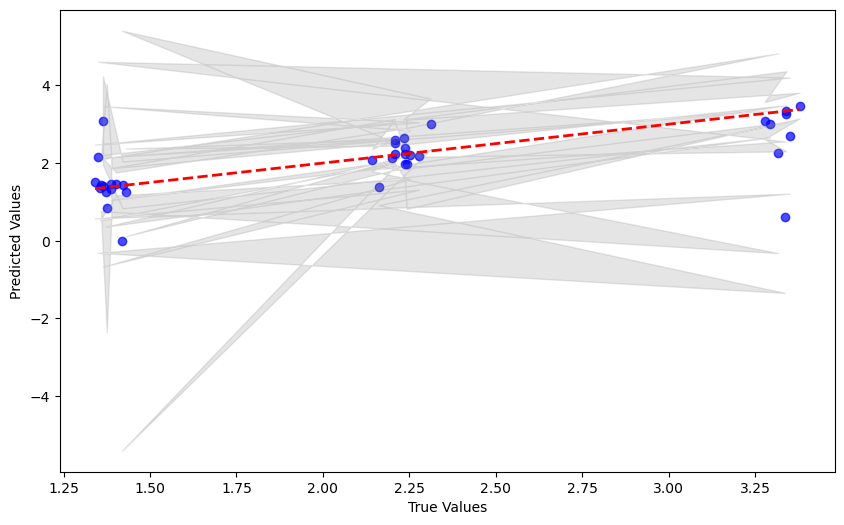

In [11]:
# Plot predictions vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.fill_between(
    y_test, 
    y_pred_test - 1.96 * sigma_test, 
    y_pred_test + 1.96 * sigma_test, 
    color='gray', 
    alpha=0.2, 
    label="95% Confidence Interval"
)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')